<a href="https://colab.research.google.com/github/indirask28/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Data**

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv
Saving Data Train.csv to Data Train.csv


## **Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

## **Gathering Data**

In [5]:
train_data = pd.read_csv('/content/Data Train.csv')
test_data = pd.read_csv('/content/Data Test.csv')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
train_data.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


count: Jumlah non-null entries dalam kolom.

unique: Jumlah nilai unik dalam kolom.

top: Nilai yang paling sering muncul dalam kolom.

freq: Frekuensi dari nilai yang paling sering muncul.

In [8]:
train_data.describe(include = 'O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


## **EDA**

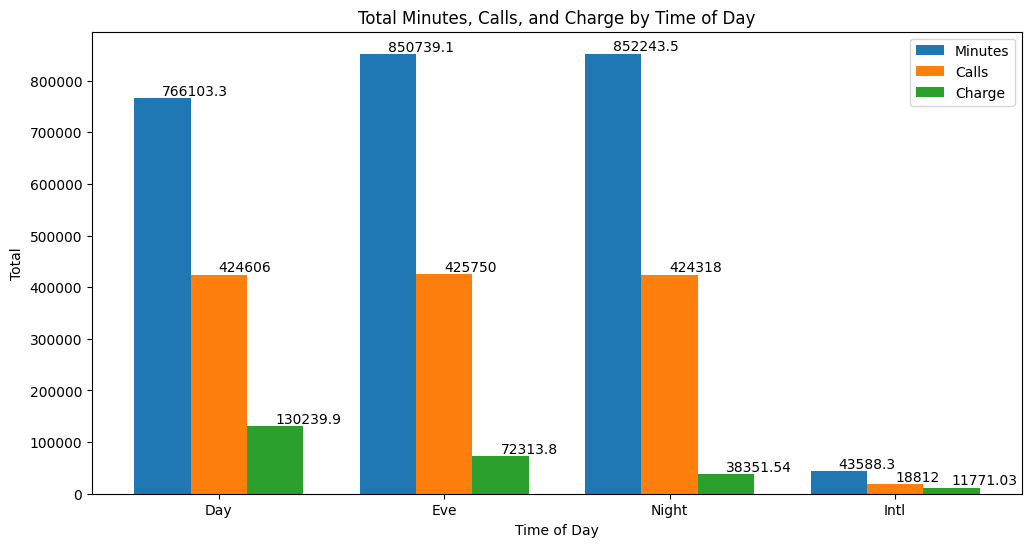

In [29]:
# Data yang akan divisualisasikan
total_data = {
    'Day': {
        'Minutes': train_data['total_day_minutes'].sum(),
        'Calls': train_data['total_day_calls'].sum(),
        'Charge': train_data['total_day_charge'].sum()
    },
    'Eve': {
        'Minutes': train_data['total_eve_minutes'].sum(),
        'Calls': train_data['total_eve_calls'].sum(),
        'Charge': train_data['total_eve_charge'].sum()
    },
    'Night': {
        'Minutes': train_data['total_night_minutes'].sum(),
        'Calls': train_data['total_night_calls'].sum(),
        'Charge': train_data['total_night_charge'].sum()
    },
    'Intl': {
        'Minutes': train_data['total_intl_minutes'].sum(),
        'Calls': train_data['total_intl_calls'].sum(),
        'Charge': train_data['total_intl_charge'].sum()
    }
}

# Mengatur lebar bar
bar_width = 0.25
index = np.arange(len(total_data))

# Membuat grafik bar
plt.figure(figsize=(12, 6))

bar1 = plt.bar(index - bar_width, [total_data[key]['Minutes'] for key in total_data], bar_width, label='Minutes')
bar2 = plt.bar(index, [total_data[key]['Calls'] for key in total_data], bar_width, label='Calls')
bar3 = plt.bar(index + bar_width, [total_data[key]['Charge'] for key in total_data], bar_width, label='Charge')

# Menambahkan label di dalam setiap bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Time of Day')
plt.ylabel('Total')
plt.title('Total Minutes, Calls, and Charge by Time of Day')
plt.xticks(index, total_data.keys())
plt.legend()

plt.show()


In [30]:
train_data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [31]:
cols = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']

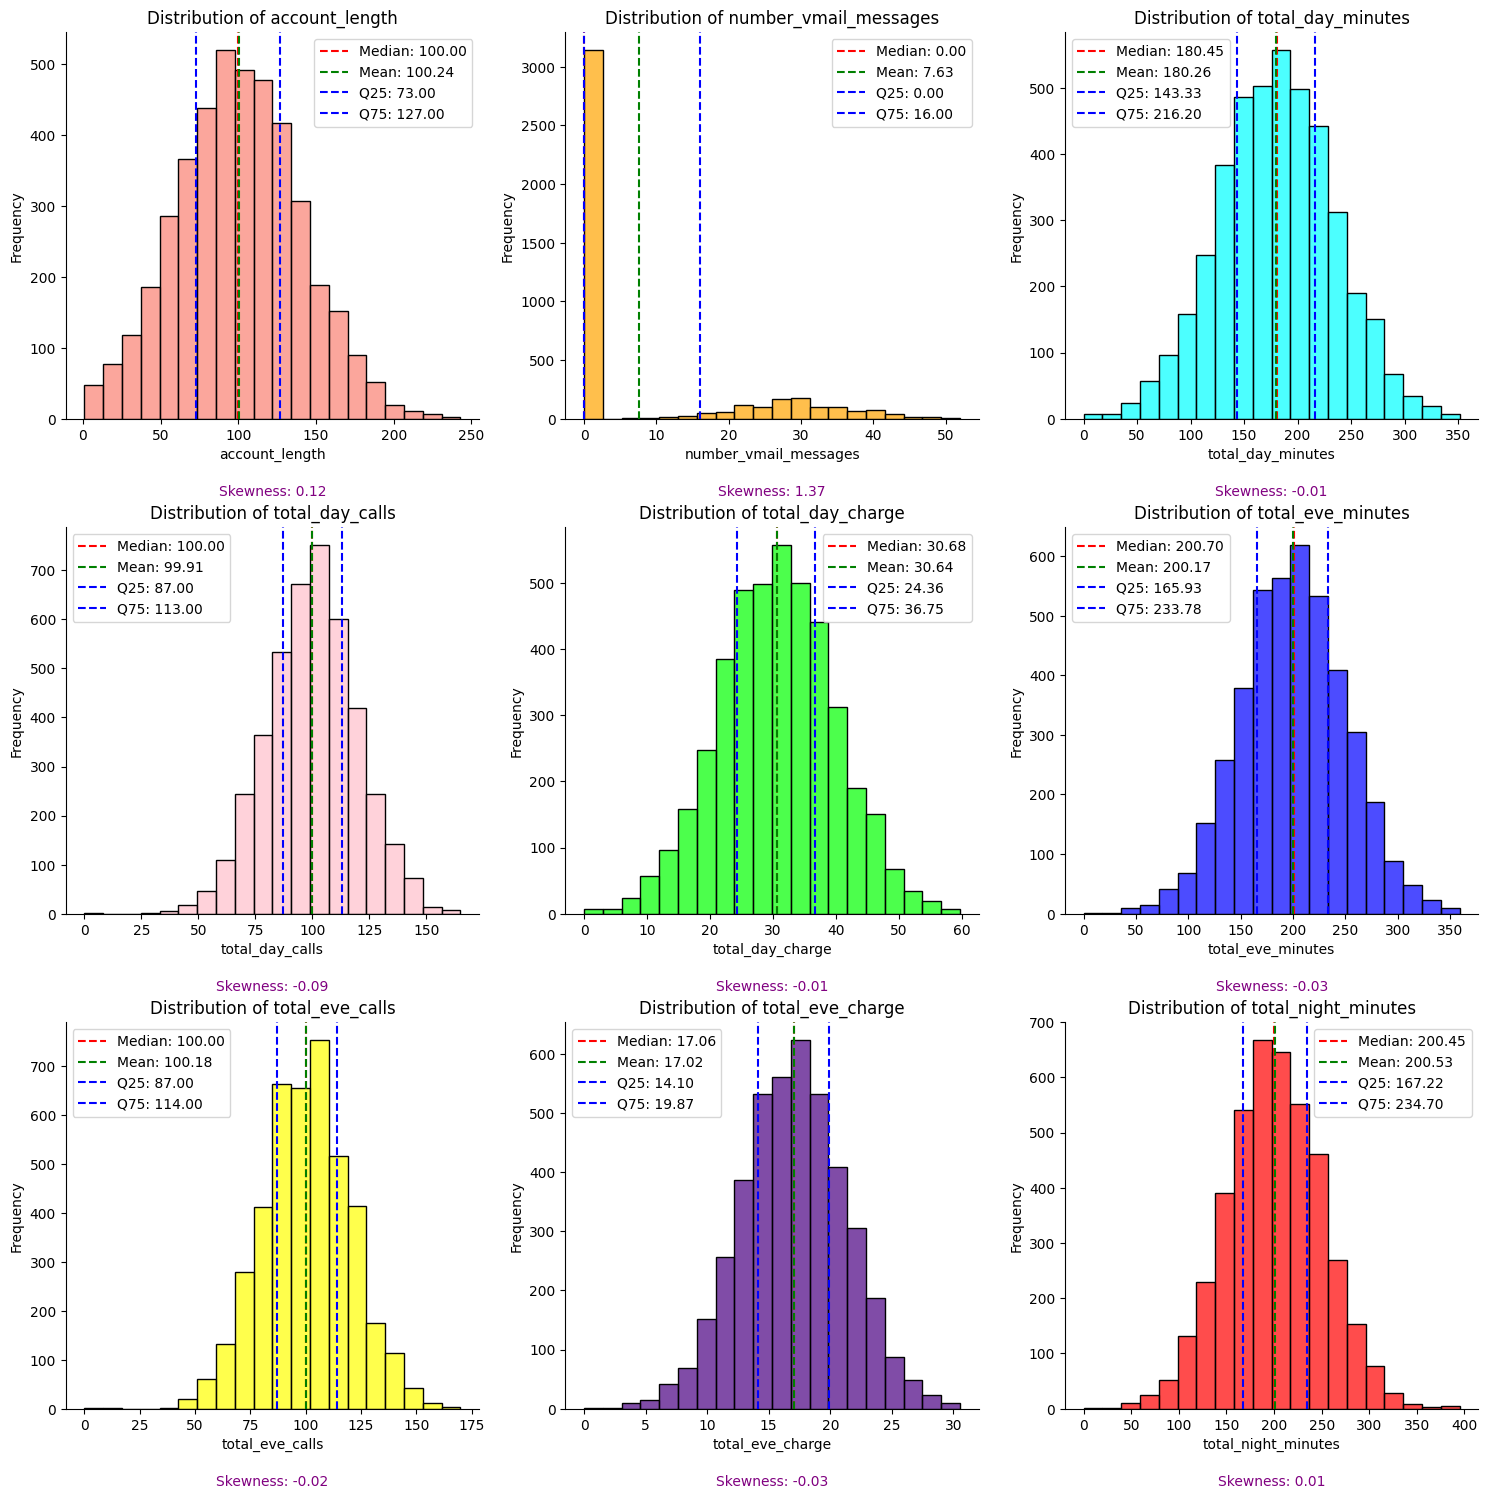

In [32]:
col_colors = {
    'state': 'skyblue',
    'account_length': 'salmon',
    'area_code': 'lightgreen',
    'international_plan': 'gold',
    'voice_mail_plan': 'purple',
    'number_vmail_messages': 'orange',
    'total_day_minutes': 'cyan',
    'total_day_calls': 'pink',
    'total_day_charge': 'lime',
    'total_eve_minutes': 'blue',
    'total_eve_calls': 'yellow',
    'total_eve_charge': 'indigo',
    'total_night_minutes': 'red',
    'total_night_calls': 'teal',
    'total_night_charge': 'magenta',
    'total_intl_minutes': 'orchid',
    'total_intl_calls': 'darkorange',
    'total_intl_charge': 'lightblue',
    'number_customer_service_calls': 'darkred',
    'churn': 'darkgreen'
}

n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

axes = axes.flatten()

for i, col in enumerate(cols[:n_rows*n_cols]):
    data = train_data[col]

    data_numeric = pd.to_numeric(data, errors='coerce').dropna()

    sns.histplot(data_numeric, bins=20, color=col_colors[col], edgecolor='black', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    skewness = data_numeric.skew()
    axes[i].text(0.5, -0.2, f'Skewness: {skewness:.2f}', transform=axes[i].transAxes, ha='center', fontsize=10, color='purple')

    if len(data_numeric) > 0:
        median = np.median(data_numeric)
        mean = np.mean(data_numeric)
        q25, q75 = np.percentile(data_numeric, [25, 75])
        axes[i].axvline(median, color='r', linestyle='--', label=f'Median: {median:.2f}')
        axes[i].axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.2f}')
        axes[i].axvline(q25, color='b', linestyle='--', label=f'Q25: {q25:.2f}')
        axes[i].axvline(q75, color='b', linestyle='--', label=f'Q75: {q75:.2f}')

        axes[i].legend()

        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


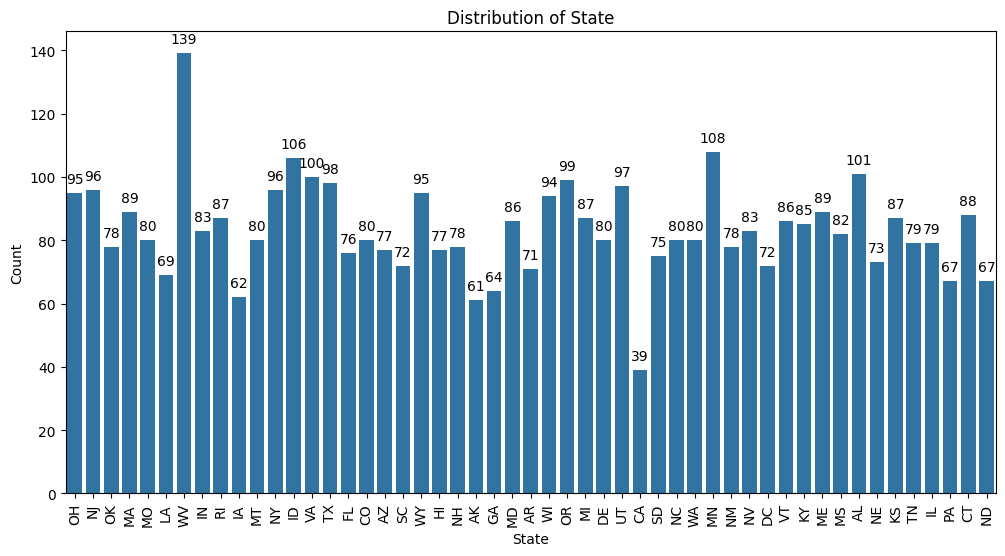

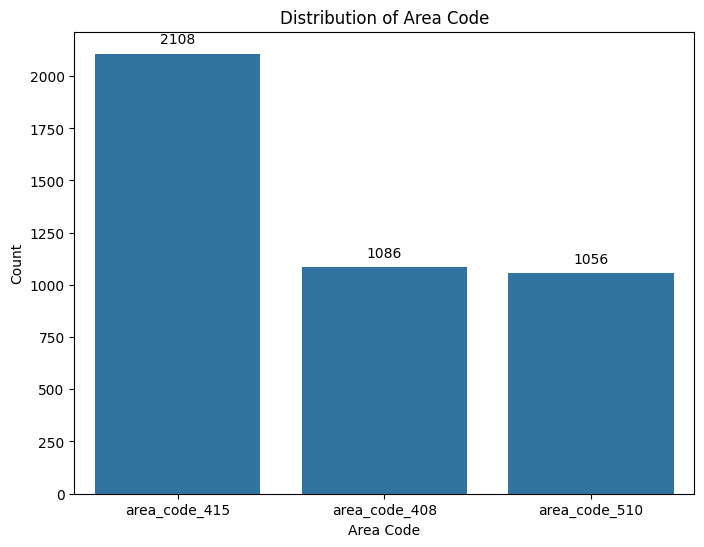

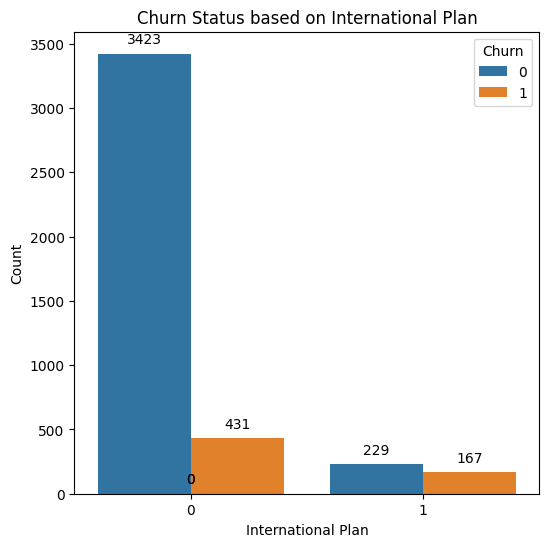

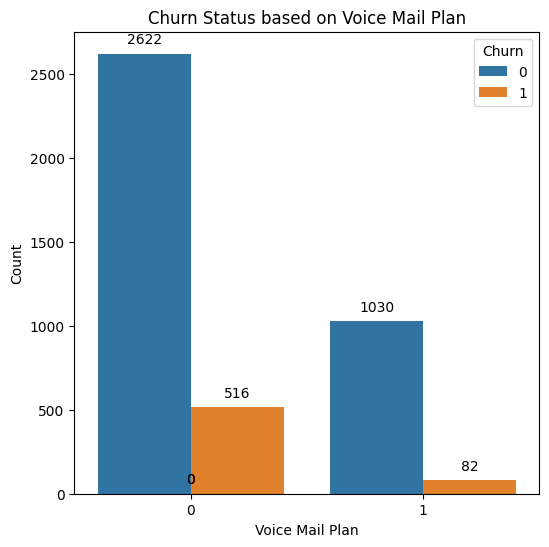

area_code  area_code_408  area_code_415  area_code_510
churn                                                 
0                    934           1821            897
1                    152            287            159


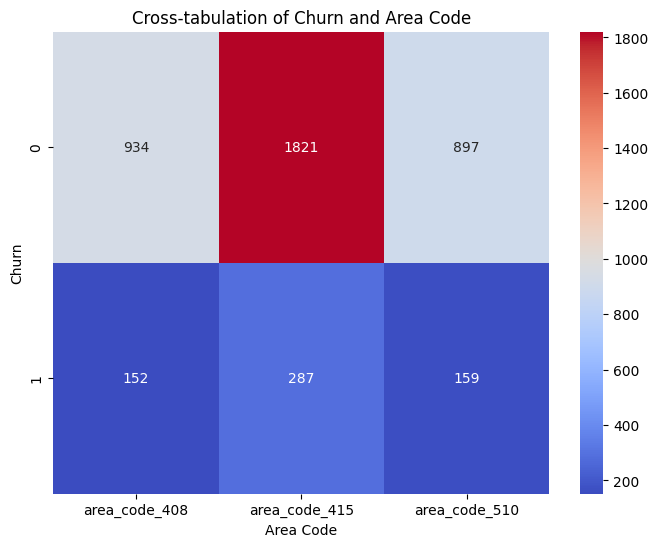

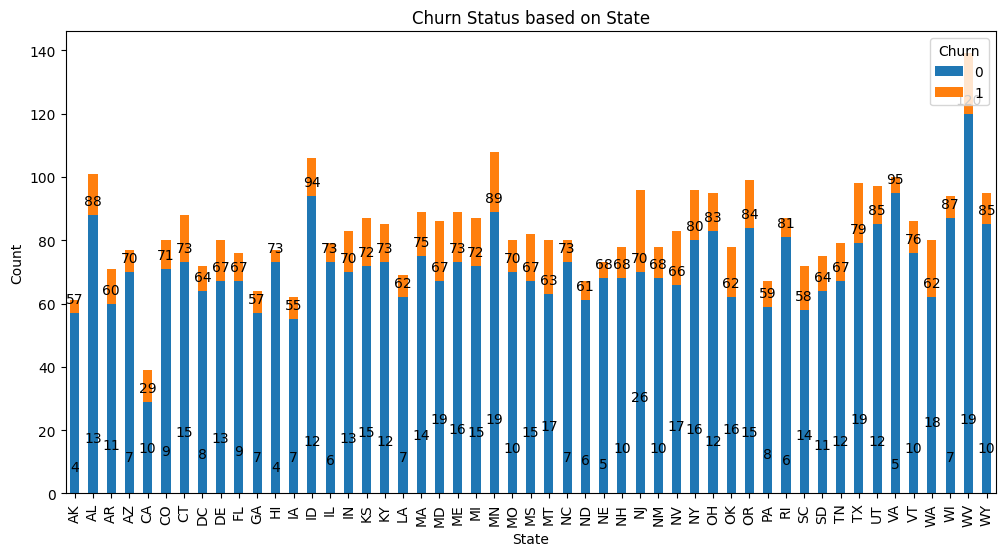

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=train_data)
plt.title('Distribution of State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='area_code', data=train_data)
plt.title('Distribution of Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='international_plan', hue='churn', data=train_data)
plt.title('Churn Status based on International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='voice_mail_plan', hue='churn', data=train_data)
plt.title('Churn Status based on Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

cross_tab = pd.crosstab(train_data['churn'], train_data['area_code'])
print(cross_tab)
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Cross-tabulation of Churn and Area Code')
plt.xlabel('Area Code')
plt.ylabel('Churn')
plt.show()

state_churn = train_data.groupby(['state', 'churn']).size().unstack()
state_churn.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn Status based on State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', loc='upper right')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()


In [34]:
# Mendefiniskan outliers value
def detect_extreme_outliers(series, threshold_multiplier=3):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - threshold_multiplier * IQR
  upper_bound = Q3 + threshold_multiplier * IQR
  extreme_outliers = (series < lower_bound) | (series > upper_bound)
  return extreme_outliers

In [35]:
numerical_variables = ['account_length', 'number_vmail_messages',
'total_day_minutes',
'total_day_calls', 'total_day_charge',
'total_eve_minutes',
'total_eve_calls', 'total_eve_charge',
'total_night_minutes',
'total_night_calls', 'total_night_charge',
'total_intl_minutes',
'total_intl_calls', 'total_intl_charge',
'number_customer_service_calls']


In [36]:
# Identify extreme outliers
variables_with_extreme_outliers = {}
for variable in numerical_variables:
  extreme_outliers = detect_extreme_outliers(train_encoded[variable])
  if extreme_outliers.any():
    variables_with_extreme_outliers[variable] = extreme_outliers

In [37]:
for variable, extreme_outliers in variables_with_extreme_outliers.items():
  print(f"Variable '{variable}' has extreme outliers:\n{extreme_outliers[extreme_outliers].index}\n")

Variable 'total_intl_calls' has extreme outliers:
Int64Index([18, 312, 824, 1320, 2222, 2503, 2793, 2810, 2994, 3068, 3091, 3247,
            3781, 4249],
           dtype='int64')

Variable 'number_customer_service_calls' has extreme outliers:
Int64Index([ 277,  433,  449,  577,  602,  650,  754,  759,  816, 1072, 1192,
            1268, 1380, 1427, 1544, 1575, 1619, 1625, 1889, 1979, 2023, 2030,
            2064, 2357, 2500, 2506, 2523, 2559, 2608, 2636, 2704, 3030, 3038,
            3254, 3462, 3648, 3656, 3734, 3847, 3931, 3970, 3986, 4061, 4072,
            4180],
           dtype='int64')



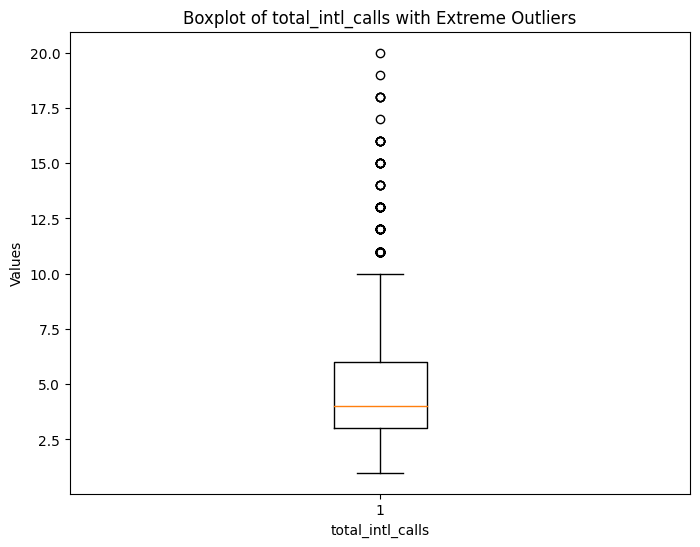

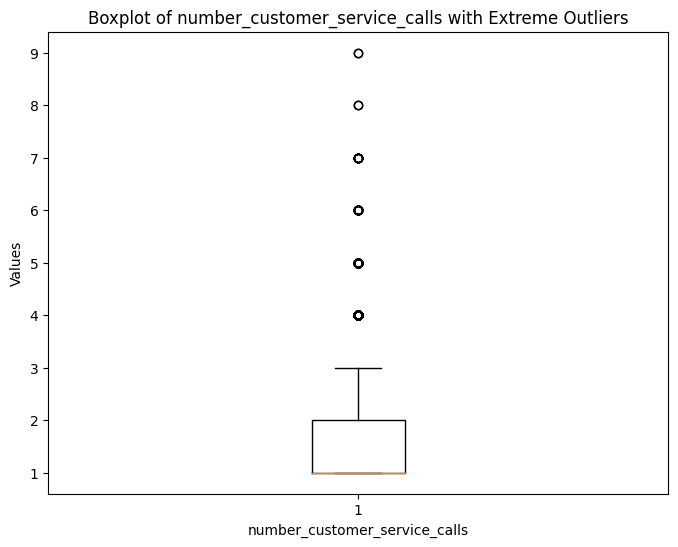

In [38]:
for variable, extreme_outliers in variables_with_extreme_outliers.items():
  plt.figure(figsize=(8, 6))
  plt.boxplot(train_encoded[variable])
  plt.title(f'Boxplot of {variable} with Extreme Outliers')
  plt.xlabel(variable)
  plt.ylabel('Values')
plt.show()

In [39]:
# Fix Outliers
def winsorize(series):
  p1 = np.percentile(series, 1)
  p99 = np.percentile(series, 99)
  return np.clip(series, p1, p99)

In [40]:
variables_with_outliers = ['total_intl_calls','number_customer_service_calls']
for variable in variables_with_outliers:
  train_encoded[variable] = winsorize(train_encoded[variable])
# Verifikasi data
train_encoded.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,1


## **Pre-processing**

In [17]:
# Cari missing value
missing_values = train_data.isnull().sum()

print("Jumlah missing value per kolom:")
print(missing_values)

Jumlah missing value per kolom:
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [18]:
#One hot encoding
def train_replace(train_data, columns):
    # Loop melalui setiap kolom yang ingin diubah
    for col in columns:
        train_data[col] = train_data[col].replace({'yes': 1, 'no': 0})

    return train_data

In [19]:
def test_replace(test_data, columns):
    # Loop melalui setiap kolom yang ingin diubah
    for col in columns:
        test_data[col] = test_data[col].replace({'yes': 1, 'no': 0})

    return test_data

In [20]:
train_to_replace = ['international_plan', 'voice_mail_plan', 'churn']

# Menggunakan fungsi untuk mengganti nilai 'yes' dan 'no' dengan biner
train_data_modified = train_replace(train_data, train_to_replace)

# Tampilkan hasil
print(train_data_modified)

     state  account_length      area_code  international_plan  \
0       OH             107  area_code_415                   0   
1       NJ             137  area_code_415                   0   
2       OH              84  area_code_408                   1   
3       OK              75  area_code_415                   1   
4       MA             121  area_code_510                   0   
...    ...             ...            ...                 ...   
4245    MT              83  area_code_415                   0   
4246    WV              73  area_code_408                   0   
4247    NC              75  area_code_408                   0   
4248    HI              50  area_code_408                   0   
4249    VT              86  area_code_415                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                   1                     26              161.6   
1                   0                      0              243.4   
2                 

In [21]:
test_to_replace = ['international_plan', 'voice_mail_plan']

# Menggunakan fungsi untuk mengganti nilai 'yes' dan 'no' dengan biner
test_data_modified = test_replace(test_data, test_to_replace)

# Tampilkan hasil
print(test_data)

      id state  account_length      area_code  international_plan  \
0      1    KS             128  area_code_415                   0   
1      2    AL             118  area_code_510                   1   
2      3    IA              62  area_code_415                   0   
3      4    VT              93  area_code_510                   0   
4      5    NE             174  area_code_415                   0   
..   ...   ...             ...            ...                 ...   
745  746    GA             130  area_code_415                   0   
746  747    WA              73  area_code_408                   0   
747  748    WV             152  area_code_415                   0   
748  749    DC              61  area_code_415                   0   
749  750    DC             109  area_code_510                   0   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                  1                     25              265.1   
1                  0                   

In [22]:
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [23]:
test_data = test_data.drop('id', axis=1)

In [24]:
test_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    object 
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    object 
 3   international_plan             750 non-null    int64  
 4   voice_mail_plan                750 non-null    int64  
 5   number_vmail_messages          750 non-null    int64  
 6   total_day_minutes              750 non-null    float64
 7   total_day_calls                750 non-null    int64  
 8   total_day_charge               750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_eve_charge               750 non-null    float64
 12  total_night_minutes            750 non-null    flo

In [26]:
train_encoded = pd.get_dummies(train_data, columns=['state', 'area_code'])
# Lakukan one-hot encoding untuk data uji
test_encoded = pd.get_dummies(test_data, columns=['state', 'area_code'])

In [27]:
numeric_columns = train_encoded.select_dtypes(include=np.number).columns
train_encoded[numeric_columns] = train_encoded[numeric_columns].fillna(train_encoded[numeric_columns].mean())

print(train_encoded.head())

   account_length  international_plan  voice_mail_plan  number_vmail_messages  \
0             107                   0                1                     26   
1             137                   0                0                      0   
2              84                   1                0                      0   
3              75                   1                0                      0   
4             121                   0                1                     24   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              161.6              123             27.47              195.5   
1              243.4              114             41.38              121.2   
2              299.4               71             50.90               61.9   
3              166.7              113             28.34              148.3   
4              218.2               88             37.09              348.5   

   total_eve_calls  total_eve_charge  ...  s

In [28]:
columns_with_zero_implausible = ['total_day_minutes', 'total_day_calls',
'total_day_charge',
'total_eve_minutes', 'total_eve_calls',
'total_eve_charge',
'total_night_minutes',
'total_night_calls', 'total_night_charge',
'total_intl_minutes', 'total_intl_calls',
'total_intl_charge',
'number_customer_service_calls']
for col in columns_with_zero_implausible:
  median_value = train_encoded[col].median()
  train_encoded.loc[train_encoded[col] == 0, col] = median_value
  train_encoded.head()

## **Normalisasi Data**

In [41]:
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_encoded.drop(columns=['churn']))
data_normalized = pd.DataFrame(normalized_features, columns=train_encoded.drop(columns=['churn']).columns)

data_normalized.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.438017,0.0,1.0,0.500000,0.455718,0.688889,0.455664,0.513947,0.575949,0.513966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.561983,0.0,0.0,0.000000,0.690169,0.622222,0.690155,0.293472,0.620253,0.293296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.342975,1.0,0.0,0.000000,0.850674,0.303704,0.850641,0.117507,0.481013,0.117318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.305785,1.0,0.0,0.000000,0.470335,0.614815,0.470330,0.373887,0.696203,0.373953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.495868,0.0,1.0,0.461538,0.617942,0.429630,0.617835,0.967953,0.607595,0.967877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<ipython-input-42-41c2aedf090b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')


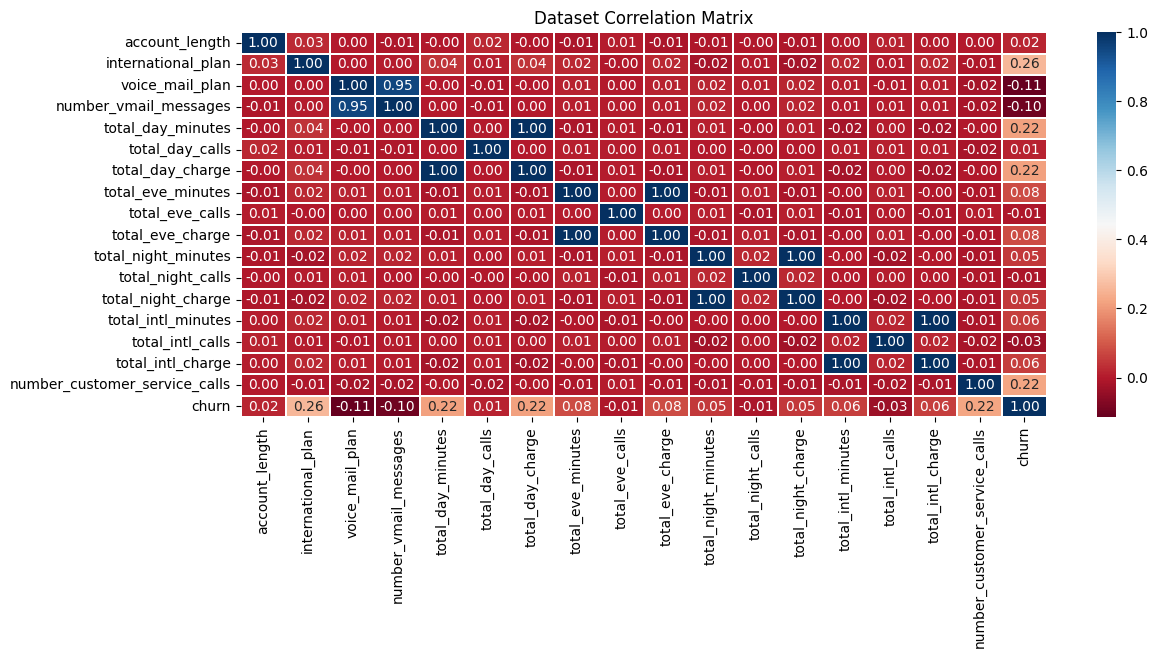

In [42]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(train_data.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Dataset Correlation Matrix', fontsize=12)
plt.show()

Split Data

In [43]:
# Pisahkan data train menjadi data latih dan data validasi
X_train, X_val, y_train, y_val = train_test_split(train_encoded.drop('churn', axis=1), train_encoded['churn'], test_size=0.2, random_state=42)

## **Modelling dan Evaluasi**

In [44]:
def Model_features(X_train, y_train, X_val, y_val, y_pred, model, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    features = X_train.columns

In [45]:
def confusion_matrix_plot(X, y_true, model, model_name):
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

### Gradient Boosting Classifier Model

In [46]:
xg_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=13, n_estimators=400)

Gradient Boosting Validation Accuracy: 0.9364705882352942
Gradient Boosting Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       721
           1       0.85      0.71      0.77       129

    accuracy                           0.94       850
   macro avg       0.90      0.84      0.87       850
weighted avg       0.93      0.94      0.93       850



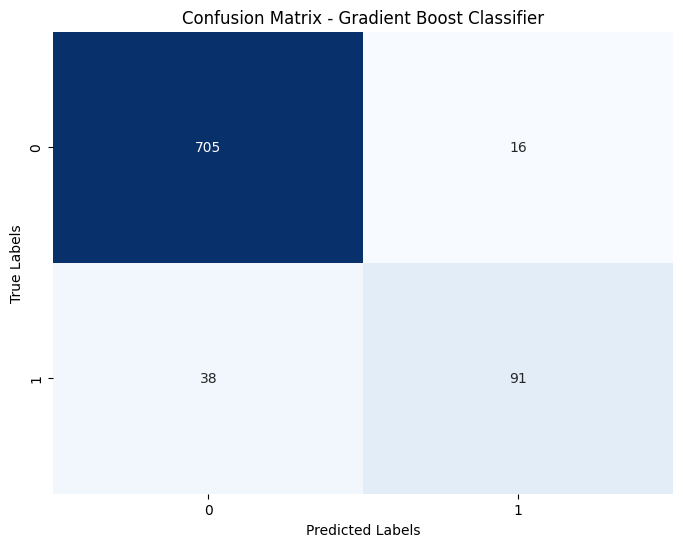

In [47]:
y_val_pred_xg = xg_model.predict(X_val)
val_accuracy_xg = accuracy_score(y_val, y_val_pred_xg)
print("Gradient Boosting Validation Accuracy:", val_accuracy_xg)
print("Gradient Boosting Validation Classification Report:")
print(classification_report(y_val, y_val_pred_xg))

Model_features(X_train , y_train , X_val , y_val  , y_val_pred_xg , xg_model , "Gradient Boost Classifier")
confusion_matrix_plot(X_val , y_val , xg_model , "Gradient Boost Classifier")

### Random Forest Model

In [48]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Validation Accuracy: 0.951764705882353
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       721
           1       0.99      0.69      0.81       129

    accuracy                           0.95       850
   macro avg       0.97      0.84      0.89       850
weighted avg       0.95      0.95      0.95       850



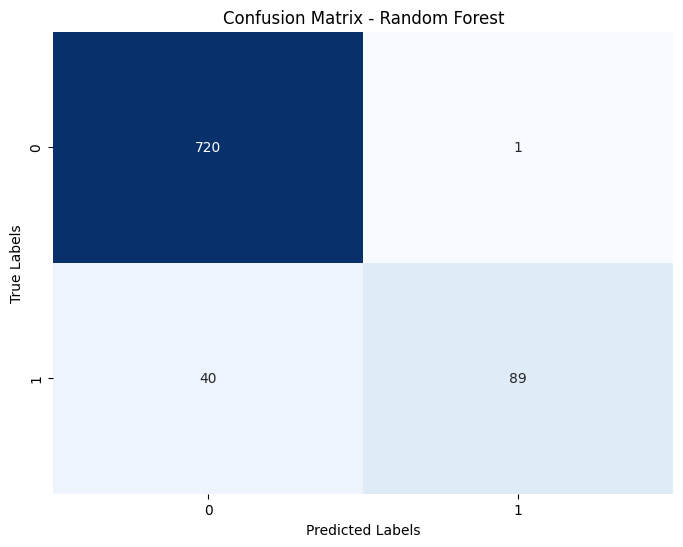

In [49]:
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

Model_features(X_train , y_train , X_val , y_val  , y_val_pred , rf_model , "Random Forest Classifier")
confusion_matrix_plot(X_val , y_val , rf_model , "Random Forest")

### Decision Tree Model

In [50]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Validation Accuracy: 0.9058823529411765
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       721
           1       0.67      0.74      0.71       129

    accuracy                           0.91       850
   macro avg       0.81      0.84      0.82       850
weighted avg       0.91      0.91      0.91       850



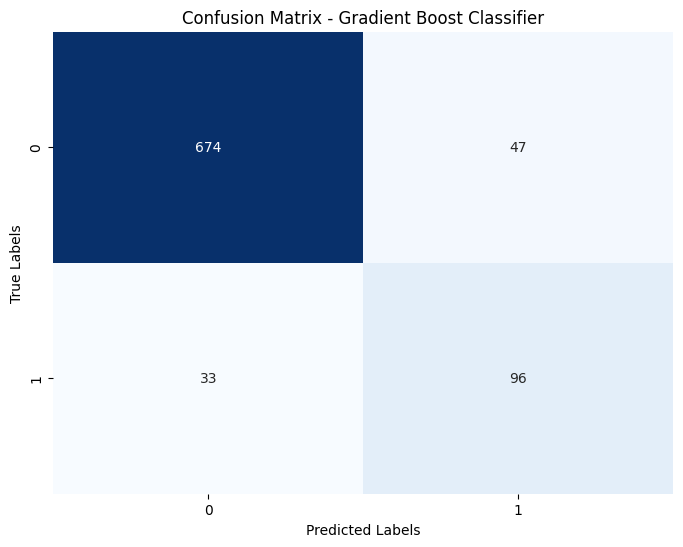

In [51]:
y_val_pred = dt_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
Model_features(X_train , y_train , X_val , y_val  , y_val_pred , dt_model , "Gradient Boost Classifier")
confusion_matrix_plot(X_val , y_val , dt_model , "Gradient Boost Classifier")

In [52]:
# Inisialisasi list untuk menyimpan hasil metrik evaluasi
model_names = ['GradientBoosting', 'RandomForest', 'DecisionTree']
accuracies = []
precisions = []
f1_scores = []
recalls = []
cross_val_scores = []

def calculate_metrics(y_true, y_pred, cv_score):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    cross_val_score = cv_score.mean()

    return accuracy, precision, f1, recall, cross_val_score

for model in [rf_model, xg_model, dt_model]:
    y_pred = model.predict(X_val)
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    accuracy, precision, f1, recall, cv_score_mean = calculate_metrics(y_val, y_pred, cv_score)

    accuracies.append(accuracy)
    precisions.append(precision)
    f1_scores.append(f1)
    recalls.append(recall)
    cross_val_scores.append(cv_score_mean)

results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'F1 Score': f1_scores,
    'Recall': recalls,
    'Cross Val Score': cross_val_scores
})

print(results)


              Model  Accuracy  Precision  F1 Score    Recall  Cross Val Score
0  GradientBoosting  0.951765   0.988889  0.812785  0.689922         0.943529
1      RandomForest  0.936471   0.850467  0.771186  0.705426         0.939412
2      DecisionTree  0.905882   0.671329  0.705882  0.744186         0.914706


## **Testing**

In [56]:
# Testing menggunakan hasil tertinggi
y_test_pred_rf = rf_model.predict(test_encoded)

In [57]:
#Decode
test_data['churn'] = y_test_pred_rf
churn_label = {0: 'no', 1: 'yes'}
test_data['churn_decoded'] = test_data['churn'].map(churn_label)

print("Hasil prediksi:")
print(test_data)

Hasil prediksi:
    state  account_length      area_code  international_plan  voice_mail_plan  \
0      KS             128  area_code_415                   0                1   
1      AL             118  area_code_510                   1                0   
2      IA              62  area_code_415                   0                0   
3      VT              93  area_code_510                   0                0   
4      NE             174  area_code_415                   0                0   
..    ...             ...            ...                 ...              ...   
745    GA             130  area_code_415                   0                0   
746    WA              73  area_code_408                   0                0   
747    WV             152  area_code_415                   0                0   
748    DC              61  area_code_415                   0                0   
749    DC             109  area_code_510                   0                0   

     number

In [58]:
test_data['id'] = test_data.index
# Prediksi yang ingin disimpan
predictions = test_data[['id', 'churn_decoded']]

# Simpan DataFrame ke dalam file CSV
predictions.to_csv('hasil_prediksi.csv', index=False)

print("Hasil prediksi telah disimpan ke dalam file hasil_prediksi.csv")


Hasil prediksi telah disimpan ke dalam file hasil_prediksi.csv
